In [1]:
# Import librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Defining a function for finding accuracy
def Acc(testSet, predictSet):
    current = 0
    for i in range(len(testSet)):
        if testSet[i] == predictSet [i]:
            current +=1
    return (current/float(len(testSet)))* 100

In [52]:
df = pd.read_csv("bank-full.csv") # reading data file

In [53]:
df.head() # checking whether data has been loaded correctly or not

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


From the info of the attributes, we can see that there are object data type, which need to be converted to numerical datatype in order to perform operations.

In [55]:
#Converting the object datatypes into numerical datatypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital']= le.fit_transform(df['marital'])
df['education']= le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform (df['housing'])
df['loan'] = le.fit_transform (df['loan'])
df['contact'] = le.fit_transform (df['contact'])
df['month'] = le.fit_transform (df['month'])
df['poutcome'] = le.fit_transform (df['poutcome'])
df['Target'] = le.fit_transform (df['Target'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


From the descriptive analysis, we see that there are abnormal (-ve) values in some atteributes

In [58]:
# handling negative values
df['balance']= df.balance.map(lambda x: (x*(-1)) if x < 0 else x)
df['pdays'] = df.pdays.map (lambda x: (x* (-1)) if x < 0 else x)

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1415.196081,3020.529906,0.0,137.0,485.0,1436.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


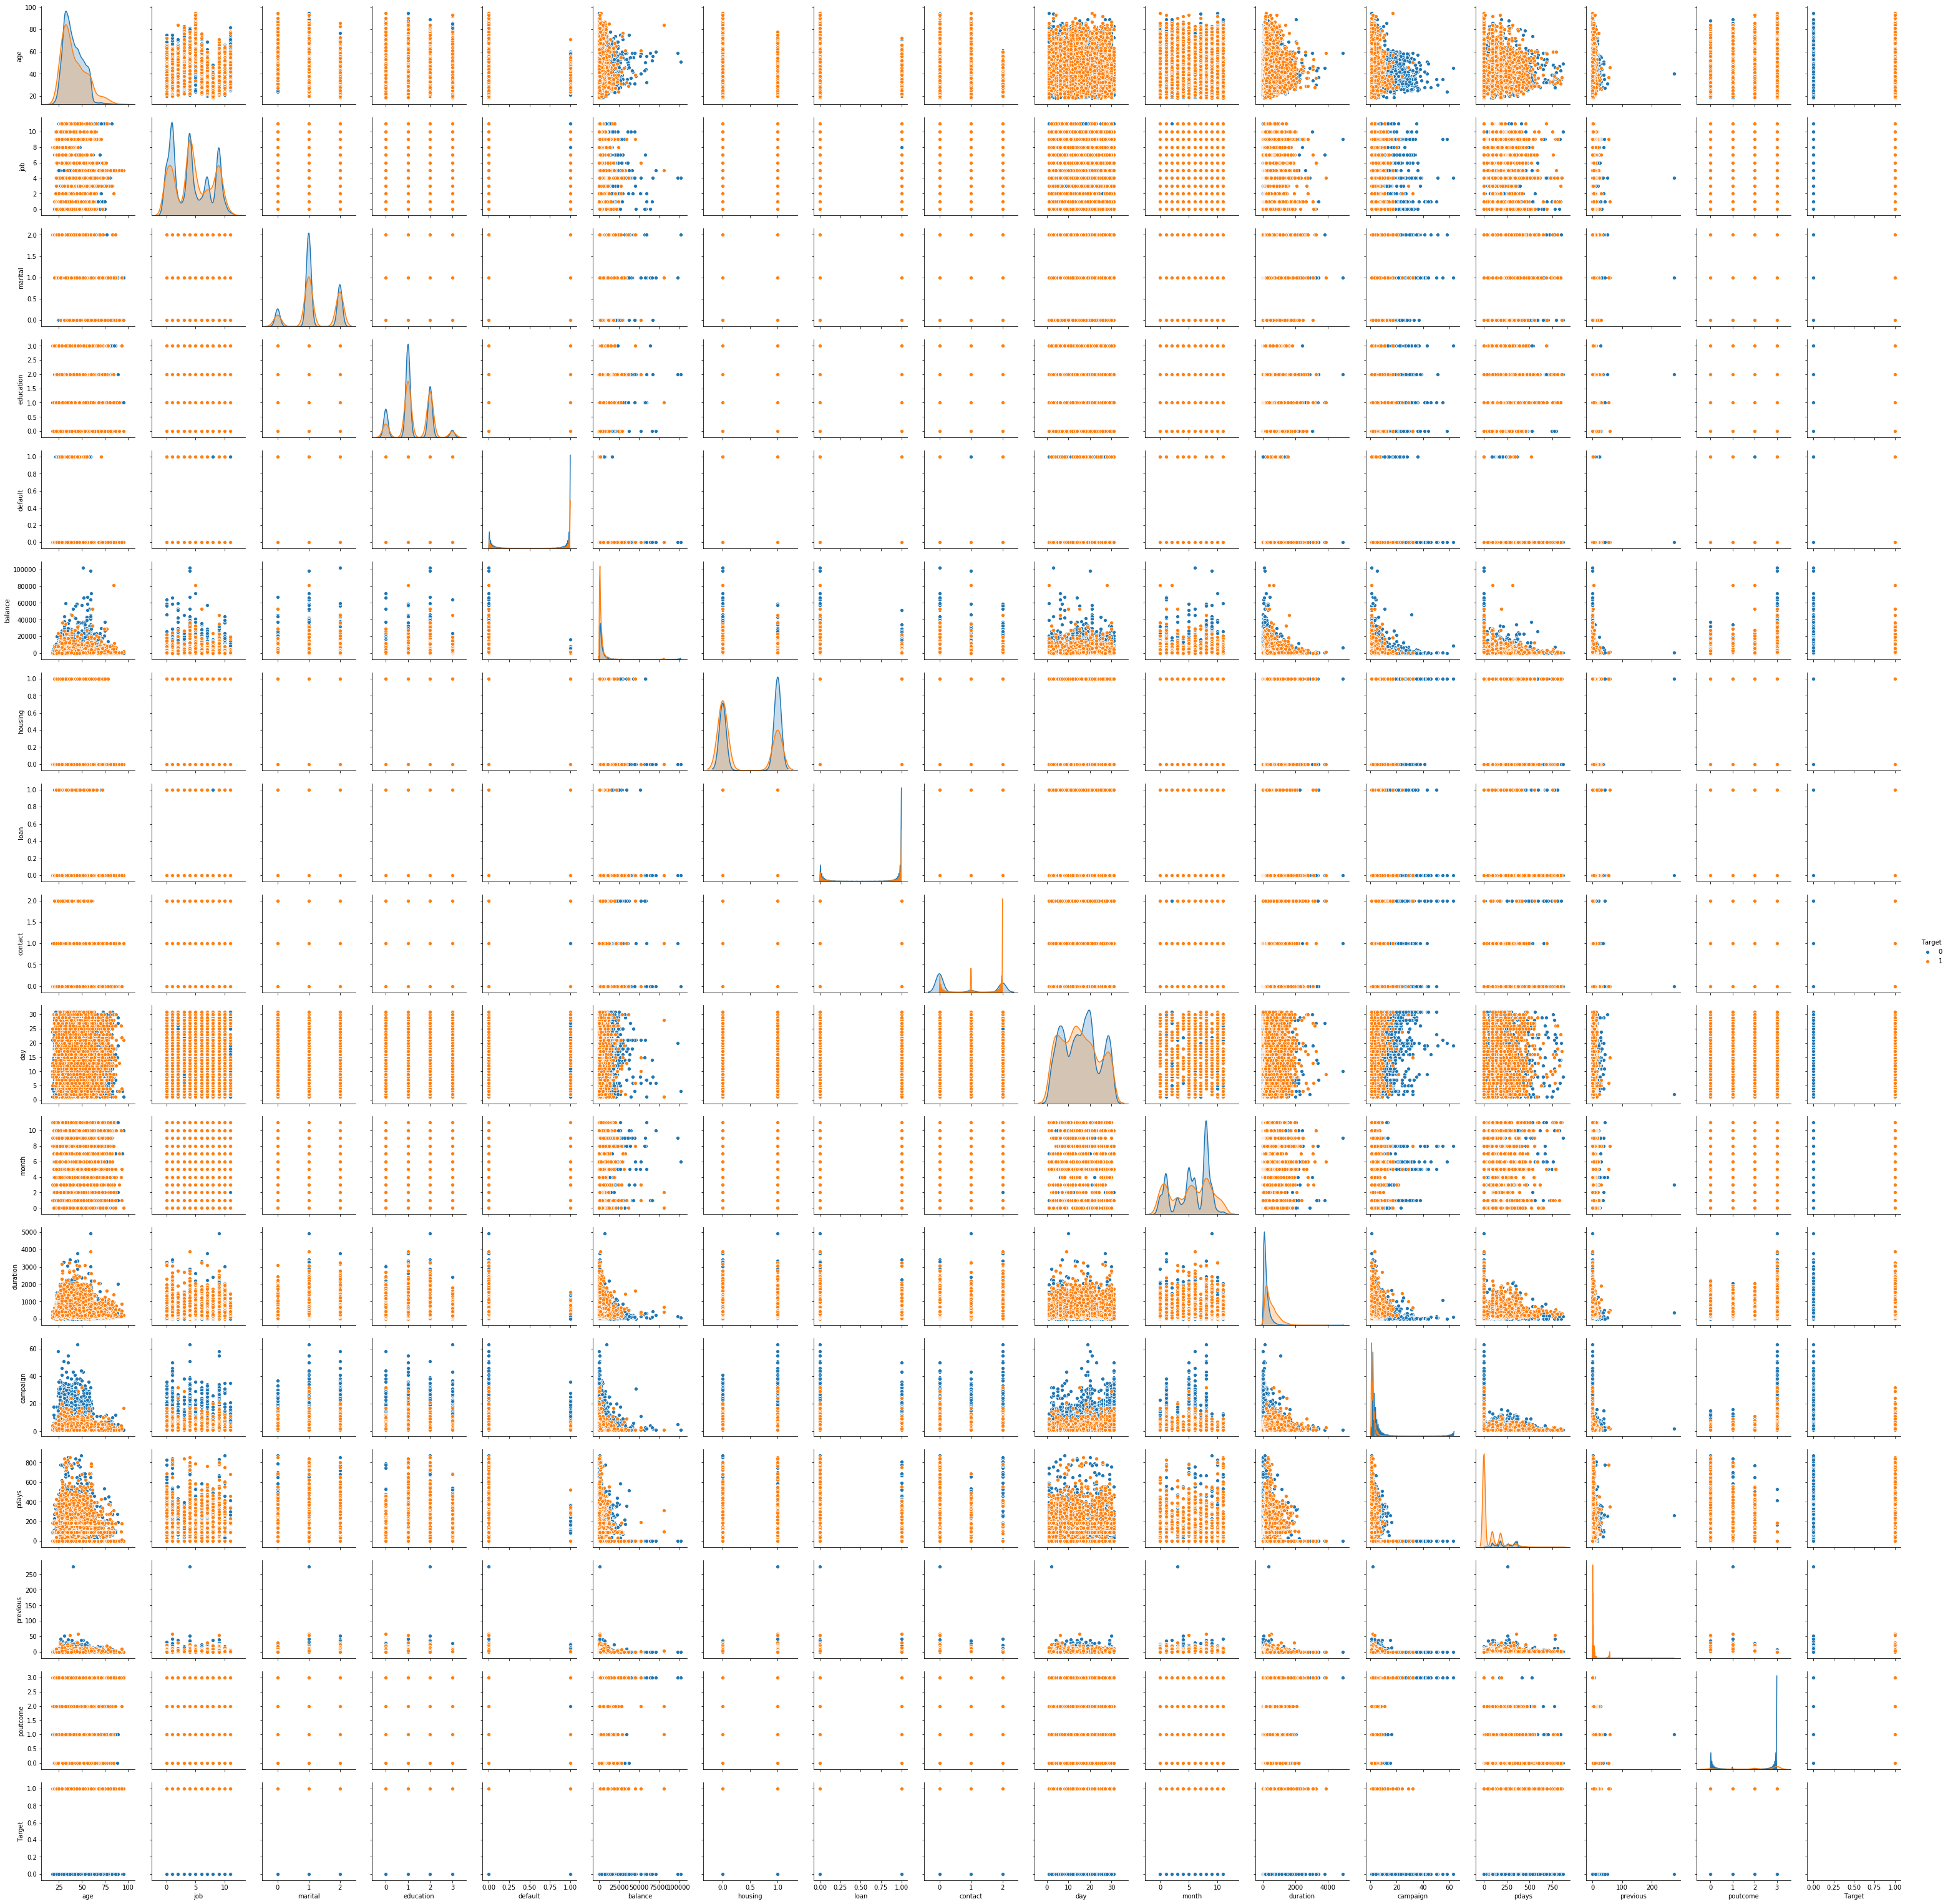

In [11]:
sns.pairplot(df, hue = "Target")

In [60]:
# normalizing the variables
from scipy.stats import zscore 

df_X = df.drop('Target', axis = 1)
df_X = zscore(df_X)

In [61]:
X = df_X
X = np.array(X)
y = df['Target']
y = np.array(y)

In [62]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [63]:
X_train.shape

(31647, 16)

In [64]:
X_test.shape

(13564, 16)

In [65]:
y_train.shape

(31647,)

In [66]:
#Running Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


lr = LogisticRegression()

In [67]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
df_y = lab_enc.fit_transform(y_train)
print(df_y)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(df_y))

[1 0 0 ... 0 1 0]
binary
binary
binary


In [68]:
lr.fit(X_train, df_y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
y_predict = lr.predict(X_test)


In [70]:
Acc(y_test, y_predict)

89.3394278973754

In [71]:
lr.score(X_test, y_test)

0.893394278973754

In [72]:
df_table = confusion_matrix(y_test, y_predict)
print(df_table)

[[11760   209]
 [ 1237   358]]


In [73]:
accuracy = (df_table[0,0] + df_table[1,1])/ (df_table[0,0]+ df_table[0,1] + df_table[1,0] + df_table[1,1])
precision = df_table[1,1]/(df_table[1,1] + df_table[0,1])
recall = df_table[1,1] /(df_table[1,1] + df_table[1,0])
f = (2 * recall * precision)/ (recall + precision)
print ('accuracy: ', round (accuracy, 2))
print("precision: ", round (precision, 2))
print("recall: ", round(recall, 2))
print("F1 score: ", round(f, 2))

accuracy:  0.89
precision:  0.63
recall:  0.22
F1 score:  0.33


In [74]:
# Applying Decision tree classifier on data without setting any hyper parameters
from sklearn.tree import DecisionTreeClassifier

dtcl = DecisionTreeClassifier()

In [75]:
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
y_predict = dtcl.predict(X_test)

In [77]:
Acc(y_test, y_predict)

87.33411972869361

In [78]:
df_table2 = confusion_matrix(y_test, y_predict)
print(df_table2)
accuracy = (df_table2[0,0] + df_table2[1,1])/ (df_table2[0,0]+ df_table2[0,1] + df_table2[1,0] + df_table2[1,1])
precision = df_table2[1,1]/(df_table2[1,1] + df_table2[0,1])
recall = df_table2[1,1] /(df_table2[1,1] + df_table2[1,0])
f = (2 * recall * precision)/ (recall + precision)
print ('accuracy: ', round (accuracy, 2))
print("precision: ", round (precision, 2))
print("recall: ", round(recall, 2))
print("F1 score: ", round(f, 2))

[[11105   864]
 [  854   741]]
accuracy:  0.87
precision:  0.46
recall:  0.46
F1 score:  0.46


In [79]:
from sklearn.ensemble import AdaBoostClassifier #Without any hyper parameters

abcl = AdaBoostClassifier()
abcl = abcl.fit(X_train, y_train)

y_test = abcl.predict(X_test)
Acc(y_test, y_predict)

89.3394278973754

In [80]:
df_table3 = confusion_matrix(y_test, y_predict)
print(df_table3)
accuracy = (df_table3[0,0] + df_table3[1,1])/ (df_table3[0,0]+ df_table3[0,1] + df_table3[1,0] + df_table3[1,1])
precision = df_table3[1,1]/(df_table3[1,1] + df_table3[0,1])
recall = df_table3[1,1] /(df_table3[1,1] + df_table3[1,0])
f = (2 * recall * precision)/ (recall + precision)
print ('accuracy: ', round (accuracy, 2))
print("precision: ", round (precision, 2))
print("recall: ", round(recall, 2))
print("F1 score: ", round(f, 2))

[[11604  1091]
 [  355   514]]
accuracy:  0.89
precision:  0.32
recall:  0.59
F1 score:  0.42


In [81]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier()
bgcl = bgcl.fit(X_train, y_train)

In [82]:
y_predict = bgcl.predict(X_test)

In [83]:
Acc(y_test, y_predict)

93.12149808316131

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)

In [85]:
y_predict = gbcl.predict(X_test)

In [86]:
Acc(y_test, y_predict)

96.9994102034798

In [87]:
print(confusion_matrix(y_test, y_predict))

[[12481   214]
 [  193   676]]


In [88]:
df_table3 = confusion_matrix(y_test, y_predict)
print(df_table3)
accuracy = (df_table3[0,0] + df_table3[1,1])/ (df_table3[0,0]+ df_table3[0,1] + df_table3[1,0] + df_table3[1,1])
precision = df_table3[1,1]/(df_table3[1,1] + df_table3[0,1])
recall = df_table3[1,1] /(df_table3[1,1] + df_table3[1,0])
f = (2 * recall * precision)/ (recall + precision)
print ('accuracy: ', round (accuracy, 2))
print("precision: ", round (precision, 2))
print("recall: ", round(recall, 2))
print("F1 score: ", round(f, 2))

[[12481   214]
 [  193   676]]
accuracy:  0.97
precision:  0.76
recall:  0.78
F1 score:  0.77


Adding Hyper parameters to the ensemble methods

In [89]:
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)
print("Accuracy of Ada Boost Classifier with hyperparameter is ", round(Acc(y_test, y_predict), 2))

Accuracy of Ada Boost Classifier with hyperparameter is  100.0


In [90]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

y_predict = bgcl.predict(X_test)
print("Accuracy of Bagging Classifier with hyperparameter is ", round(Acc(y_test, y_predict), 2))

Accuracy of Bagging Classifier with hyperparameter is  93.08


In [91]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
print("Accuracy of Gradient Boosting Classifier with hyperparameter is ", round(Acc(y_test, y_predict), 2))

Accuracy of Gradient Boosting Classifier with hyperparameter is  96.54
